<a href="https://colab.research.google.com/github/Jammyeong/MachineLearningClass/blob/main/2ndWeek/Tugas_ML_2_Citarum_Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import label_binarize
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix
)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load dataset
file_path = '/content/drive/MyDrive/smt akhir/ml/CitarumWater.csv'
df = pd.read_csv(file_path)

# Menampilkan beberapa baris awal
df.head()

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


In [6]:
# Menghapus kolom yang tidak diperlukan
X = df.drop(columns=['No', 'NamaSungai', 'TitikPantau', 'Waktu', 'Class'])
y = df['Class']

X['Temp'] = X['Temp'].str.replace('°C', '').astype(float)
X_numeric = X.select_dtypes(include=['float64', 'int64'])
X_numeric = X_numeric.fillna(X_numeric.mean())

In [7]:
# Pembagian Data ke dalam Set Pelatihan dan Pengujian
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [10]:
# Membangun dan Melatih Model Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Prediksi menggunakan model yang sudah dilatih pada data test
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)

# Menghitung Metode Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

classes = sorted(y.unique())
y_test_binarized = label_binarize(y_test, classes=classes)


auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class='ovr')

# Menampilkan Hasil Evaluasi
print("Metode Evaluasi Model")
print(f"Akurasi   : {accuracy:.4f}")
print(f"Presisi   : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"AUC       : {auc:.4f}")

Metode Evaluasi Model
Akurasi   : 0.9700
Presisi   : 0.9702
Recall    : 0.9700
F1 Score  : 0.9698
AUC       : 0.9983


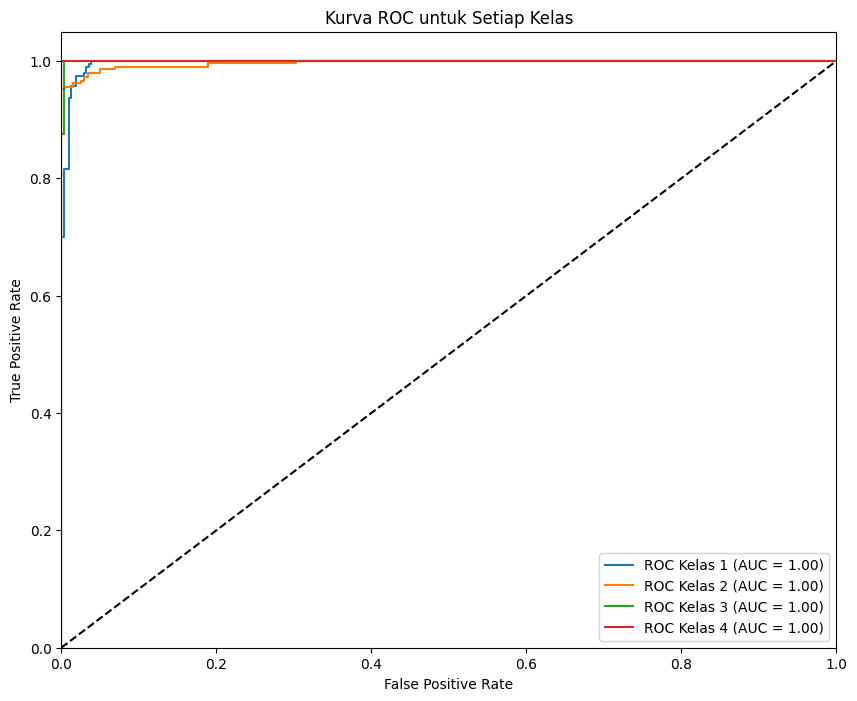

In [14]:
plt.figure(figsize=(10,8))
for idx, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, idx], y_pred_prob[:, idx])
    plt.plot(fpr, tpr, label=f'ROC Kelas {class_label} (AUC = {roc_auc_score(y_test_binarized[:, idx], y_pred_prob[:, idx]):.2f})')
# Menambahkan garis diagonal dari (0, 0) ke (1, 1) sebagai garis referensi untuk model acak
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Kurva ROC untuk Setiap Kelas')
plt.legend(loc="lower right")
plt.show()

## Persamaan Matematika


1. Persamaan logistic Regression
Pada model Multiclass Logistic Regression yang digunakan, proses prediksi dilakukan dengan menghitung probabilitas setiap sampel terhadap semua kelas yang tersedia. Setelah seluruh probabilitas dihitung, model memilih kelas dengan probabilitas tertinggi sebagai hasil prediksi. Berbeda dengan Logistic Regression binary yang menggunakan threshold 0,5, pada multiclass model ini prediksi ditentukan berdasarkan nilai probabilitas maksimum tanpa membandingkan terhadap threshold tertentu.

2. Accuracy
Akurasi mengukur berapa banyak prediksi yang benar dibandingan dengan total data:

Akurasi= TP+TN / TP+TN+FP+FN

3. Precision
Presisi mengukur seberapa banyak prediksi positif yang benar:

Presisi= TP / TP+FP

4. Recall (Sensitivitas)
Recall mengukur seberapa banyak kasus positif yang berhasil dideteksi:

Recall= TP / TP+FN

5. ROC & AUC
ROC Curve menunjukkan hubungan antara False Positive Rate (FPR) dan True Positive Rate (TPR):

TPR= TP / TP+FN , FPR= FP / FP+TN

6. AUC adalah luas area di bawah kurva ROC

AUC = 1 berarti model sempurna AUC = 0.5 berarti model tidak lebih baik dari tebak-tebakan acak.